In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth']=3
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv(r'C:\Users\rahul.kumar\Desktop\Data-Science-with-Python-Project-2--master\311_Service_Requests_from_2010_to_Present.csv', header=0,
    sep=',', parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')

In [7]:
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [17]:
def PrepareDate(df):
    df['Request_Closing_Time'] = (df['Closed Date']-df['Created Date']).dt.days
    df_clean = df[df['Request_Closing_Time'].notnull()]
    df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    df_perfect['Day of week'] = df_perfect['Created Date'].dt.dayofweek
    df_perfect['Day of Month'] = df_perfect['Created Date'].dt.day
    df_perfect['Month']=df_perfect['Created Date'].dt.month
    df_perfect['Year']=df_perfect['Created Date'].dt.year
    df_perfect=df_perfect[df_perfect.Borough!='Unspecified']
    return df_perfect

In [19]:
df_perfect = PrepareDate(df)
df_perfect.shape

(298068, 57)

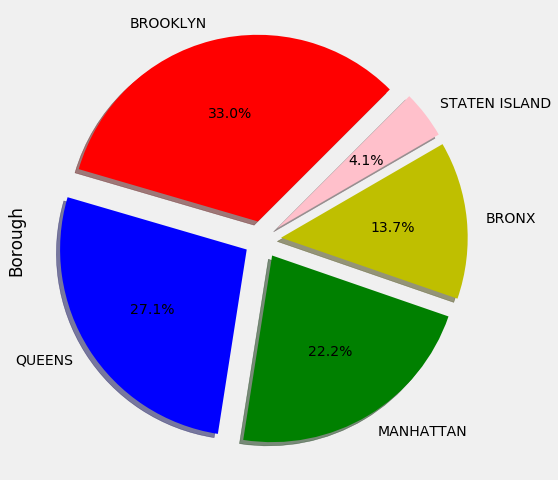

In [24]:
colors = ['r', 'b', 'g', 'y','pink']
df_perfect['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.1, 0.1, 0.1, 0.1, 0.1,), 
                                          startangle = 45, shadow=True, colors=colors, figsize = (8,8))


In [30]:
#Broklyn has the highest number of complaint and Staten island has the least number of complaints.

Blocked Driveway             76753
Illegal Parking              74314
Noise - Street/Sidewalk      48009
Noise - Commercial           35196
Derelict Vehicle             17542
Noise - Vehicle              17027
Animal Abuse                  7767
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4015
Vending                       3794
Drinking                      1272
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      422
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Squeegee                         4
Name: Complaint Type, dtype: int64


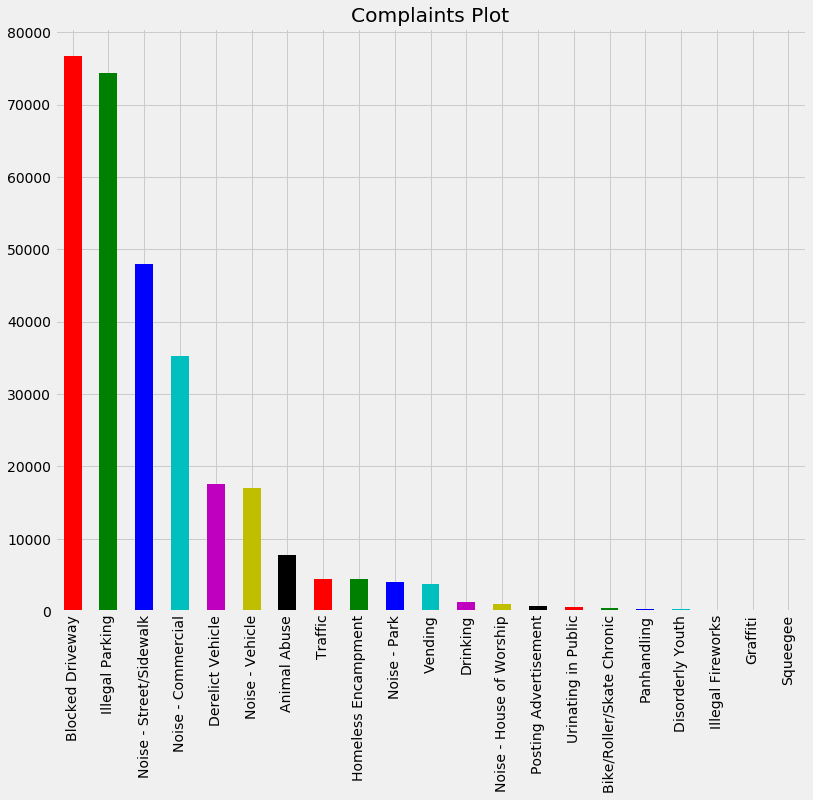

In [75]:
Complaint_Type_Number = df_perfect['Complaint Type'].value_counts()
(df_perfect['Complaint Type'].value_counts()).plot(kind='bar', figsize = (12,10), title = 'Complaints Plot', 
                                                
                                                   color = ('r', 'g', 'b', 'c', 'm','y','k' ))
print(Complaint_Type_Number)

In [38]:
#As we can see that the Blocked Driveway is most complaints item

(-74.25303107055228, -73.70076036944772, 40.50324184, 40.91218391)

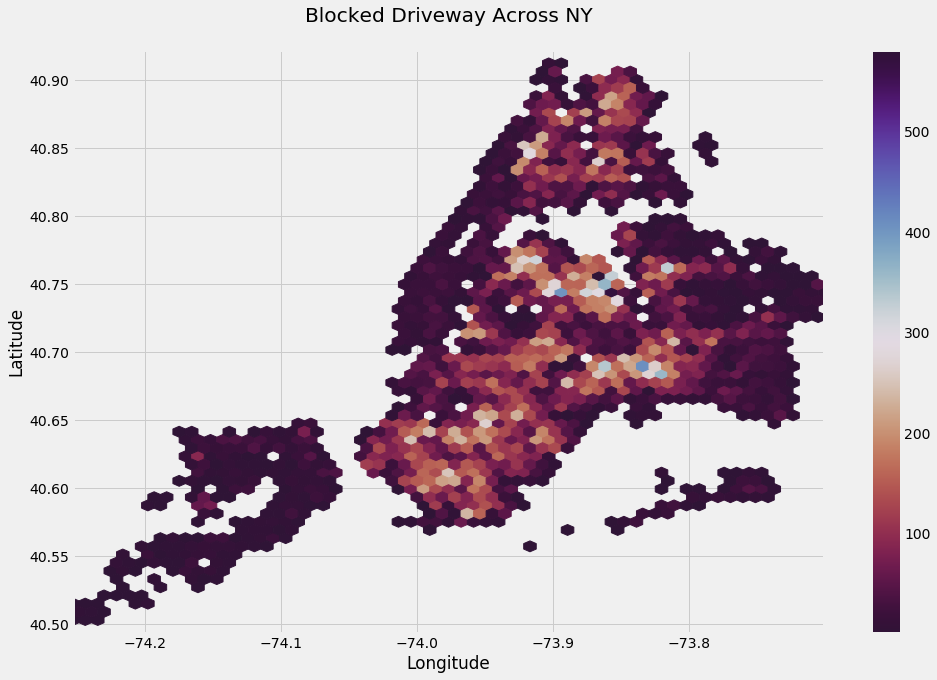

In [73]:
df_perfect_blocked_driveway = df_perfect[df_perfect['Complaint Type'] == 'Blocked Driveway']
Longitude=df_perfect['Longitude']
Latitude=df_perfect['Latitude']
df_perfect_blocked_driveway.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=60, colormap='twilight_shifted_r',
                                mincnt=1, title='Blocked Driveway Across NY\n', figsize=(15,10)).axis('equal')

In [ ]:
#As per above hexbin we can clrealy say that the Most of the Blocked Driveway is from Brroklyn Area

In [ ]:
#We will analyze brooklyn separately

In [76]:
df_Brooklyn = df_perfect[df_perfect['Borough']=='BROOKLYN']

In [78]:
df_Brooklyn.shape

(98295, 57)

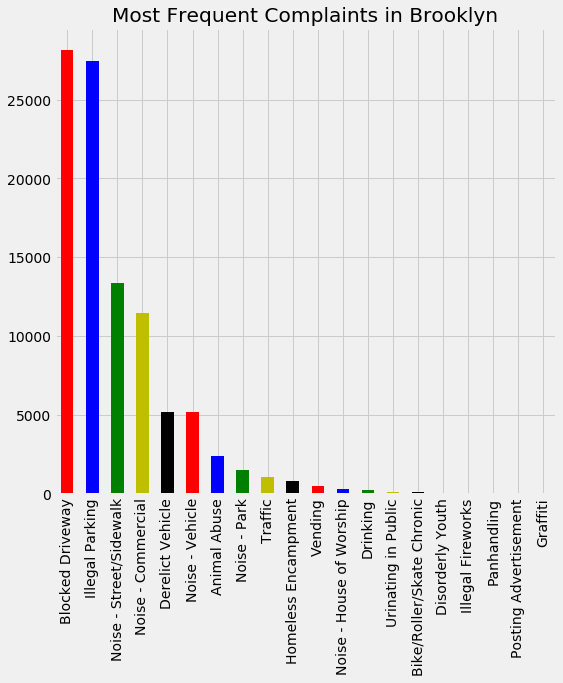

In [84]:
(df_Brooklyn['Complaint Type'].value_counts()).plot(kind='bar',figsize=(8,8),title = 'Most Frequent Complaints in Brooklyn', color=('r','b','g','y','k'))

In [ ]:
#From above bar chart we can  say that  in Brooklyn, most complaints are of Blocked Driveway.

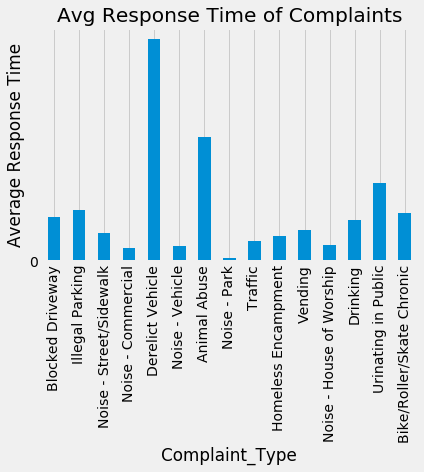

In [99]:
import matplotlib.ticker as ticker

var = df_Brooklyn.groupby('Complaint Type').Request_Closing_Time.mean()
frequent = df_Brooklyn['Complaint Type'].value_counts()
var = var.ix[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Complaints")
tick_spacing = 2
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var.head(15).plot(kind='bar')

In [ ]:
#Response time to commplaints is highest for Derelict Vehicles and least for Noise related complaints.

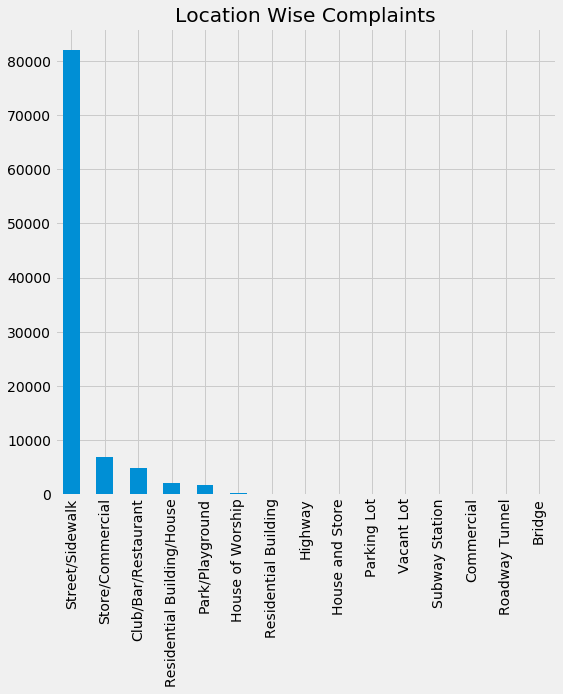

In [101]:
(df_Brooklyn['Location Type']).value_counts().plot(kind='bar', figsize=(8,8),title='Location Wise Complaints')

In [ ]:
#In Brooklyn, Most complaints or Blocked Driveway is from Streets/Sidewalks.

(-74.05417636336854, -73.84257000663148, 40.55787888282465, 40.75256694717535)

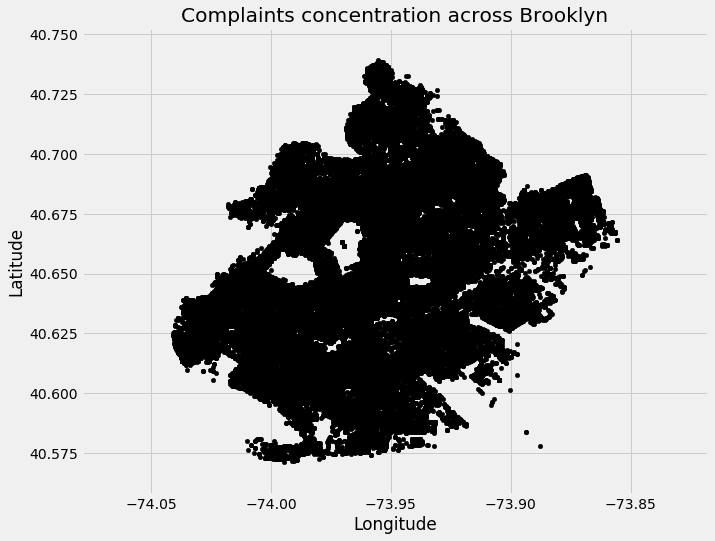

In [103]:
df_Brooklyn[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),color=('k'),title = 'Complaints concentration across Brooklyn').axis('equal')

In [129]:
#Scatter plot is able to give us proper insights of information related to complaints

(-74.04098818018522, -73.85575818981478, 40.57152101, 40.73892482)

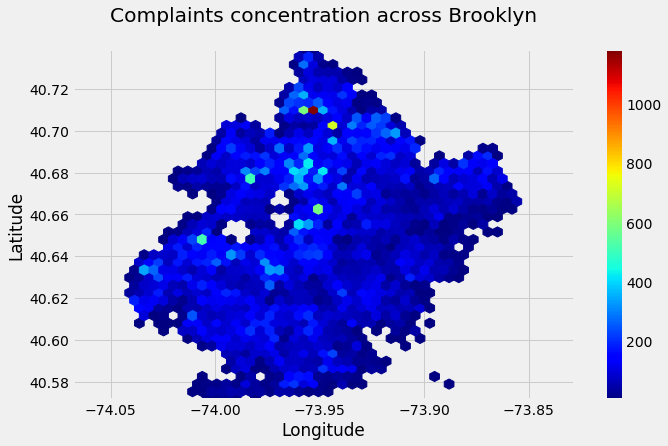

In [104]:
df_Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

In [130]:
#In above hexbin diagram we can identify that from which area of brooklyn, most complaints are reported.

In [105]:
df_perfect[df_perfect['Complaint Type'] == 'Blocked Driveway']['Descriptor'].value_counts()

No Access         56786
Partial Access    19967
Name: Descriptor, dtype: int64

In [106]:
df_Brook_BD = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'Blocked Driveway']

(-74.04069667018493, -73.85577605981507, 40.57286021, 40.73822772)

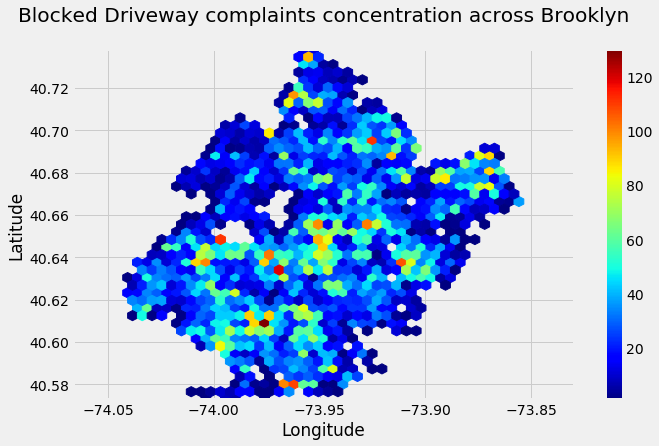

In [107]:
df_Brook_BD[df_Brook_BD['Complaint Type'] == 'Blocked Driveway'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Blocked Driveway complaints concentration across Brooklyn\n',
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

In [ ]:
#We can see that from which area the most blocked driveway complaints are reported.

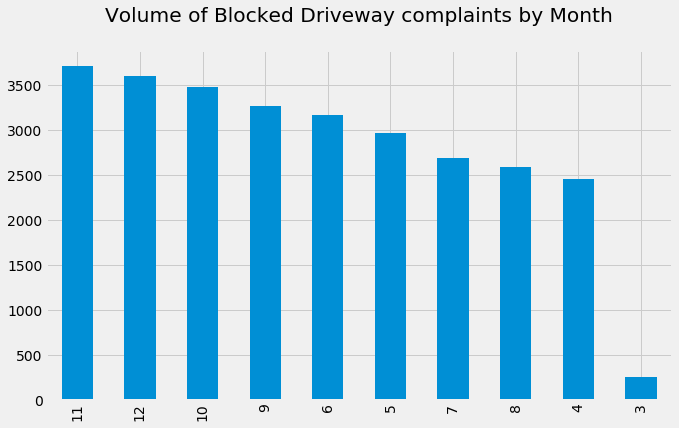

In [109]:
df_Brook_BD['Month'].value_counts().plot(kind = 'bar',figsize=(10,6),
                                         title = 'Volume of Blocked Driveway complaints by Month\n')

In [ ]:
#The complaints of blocked driveway from brooklyn is more in the month of November & december and least in the month of march.

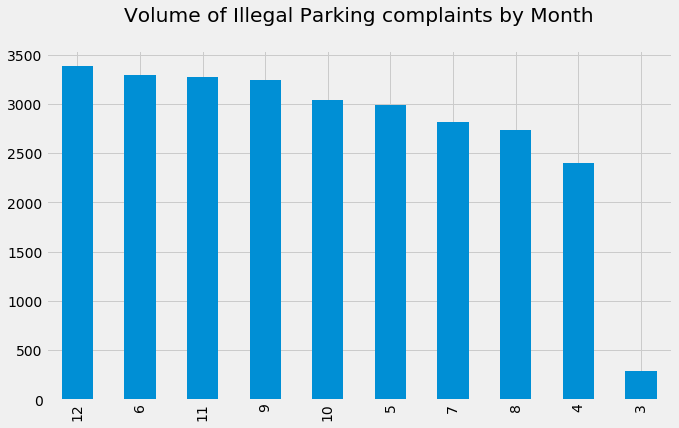

In [110]:
df_Brook_IP = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'Illegal Parking']
df_Brook_IP['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Illegal Parking complaints by Month\n')

In [131]:
#Illegal Parking complaints are more in the month of December & June and least in March.

In [111]:
def getDfSummary(input_data):
    number_nan = input_data.isnull().sum()
    number_distinct = input_data.nunique(dropna=True)
    output_data = pd.DataFrame({'number_nan':number_nan,'number_distinct':number_distinct})
    return output_data

In [112]:
getDfSummary(df_Brook_BD)

,number_nan,number_distinct
Created Date,0,27678
Closed Date,0,26449
Agency,0,1
Agency Name,0,2
Complaint Type,0,1
Descriptor,0,2
Location Type,17,1
Incident Zip,0,38
Incident Address,394,14880
Street Name,394,1291


In [116]:
def buildFeatures(dataset):
    df_features = dataset.filter(['Descriptor','Incident Zip','Request_Closing_Time','Day of Week','Day of Month','Month'],axis = 1)
    data = pd.DataFrame({'descriptor': df_features.Descriptor})
    dummies=pd.get_dummies(data)
    df_model=pd.concat([df_features,dummies],axis=1)
    df_model = df_model.drop('Descriptor',1)
    df_model = df_model.dropna()
    df_model['Incident Zip'] = df_model['Incident Zip'].astype(int)
    df_model['Request_Closing_Time']=df_model['Request_Closing_Time'].astype(int)
    df_model['Incident Zip']=df_model['Incident Zip']-df_model['Incident Zip'].min()
    return df_model

In [120]:
df_model = buildFeatures(df_Brook_BD)
df_model = df_model[['Incident Zip','Day of Month','Month','descriptor_No Access',
                     'descriptor_Partial Access','Request_Closing_Time']]
df_model.describe()

,Incident Zip,Day of Month,Month,descriptor_No Access,descriptor_Partial Access,Request_Closing_Time
count,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000
mean,18.955022,15.880733,8.240665,0.761040,0.238960,0.008313
std,11.485926,8.835269,2.624311,0.426456,0.426456,0.093499
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,6.000000,1.000000,0.000000,0.000000
50%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000
75%,29.000000,23.000000,11.000000,1.000000,0.000000,0.000000
max,48.000000,31.000000,12.000000,1.000000,1.000000,2.000000


In [121]:
def splitter(dataset,y):
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
    return X_train,X_test,y_train,y_test

In [122]:
df_model.describe()

,Incident Zip,Day of Month,Month,descriptor_No Access,descriptor_Partial Access,Request_Closing_Time
count,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000
mean,18.955022,15.880733,8.240665,0.761040,0.238960,0.008313
std,11.485926,8.835269,2.624311,0.426456,0.426456,0.093499
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,6.000000,1.000000,0.000000,0.000000
50%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000
75%,29.000000,23.000000,11.000000,1.000000,0.000000,0.000000
max,48.000000,31.000000,12.000000,1.000000,1.000000,2.000000


In [123]:
df_model.Request_Closing_Time.value_counts()

0    27920
1      220
2        7
Name: Request_Closing_Time, dtype: int64

In [124]:
getDfSummary(df_model)

,number_nan,number_distinct
Incident Zip,0,38
Day of Month,0,31
Month,0,10
descriptor_No Access,0,2
descriptor_Partial Access,0,2
Request_Closing_Time,0,3


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = splitter(df_model,df_model['Request_Closing_Time'])
X1 = X_train
Y1 = y_train
X2 = X_test
Y2 = y_test

log=LogisticRegression(C=1e30)
log.fit(X1,Y1)
accuracy_score(Y2,log.predict(X2))

0.9997631734754292

In [126]:
print(log.predict(X2))

[0 0 0 ... 0 0 0]


In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import scipy as sp

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X1,Y1)

y1_model = clf.score(X1,Y1)
y2_model = clf.score(X2,Y2)

print("Accuracy on training dataset = ",y1_model*100,"%","\nAccuracy on test dataset = ",y2_model*100,"%")

Accuracy on training dataset =  100.0 % 
Accuracy on test dataset =  100.0 %


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1, Y1)

predicted = rf.predict(X2)
accuracy = accuracy_score(Y2, predicted)
accuracy

0.9997631734754292

In [133]:
##Conclusion#
#Judging by the accuracy of all the models, it safe to conclude that Blocked Driveway related issues are assured to be resolved within a day.

#It was evident from the begining, the Resolution Time (Request_Closing_Time) of more than 99% (27920 of 28,147) cases related to Blocked Driveway was less that a day. Only about 0.7% (220 of 28,147) of the cases took 1 day to resolve. And even lesser (7 of 28,147) took 2 days.

#Clearly, the problem is not with the Resolution time for the issue but with the prolonged time of existance of the issue (almost thoroughout the year except March).

#The root cause of this could be due the large number of Derelict Vehicles complaints among the other top complaints. Derelict Vehicles can in turn give rise to problems like Illegal Parking and Blocked Driveway. Derelict Vehicles also has a significantly longer Resolution Time (Request_Closing_Time) causing the problem to persists throughout the year.